# Arbres de décision

Les arbres de décisions sont des modèles très puissant pour les données tabulaires. 


L'objectif de ce TP est d'étudier un peu leur comportement


In [1]:
import numpy as np
import pandas as pd

Charger le dataset fournit avec pandas

In [2]:
df = pd.read_csv("tumor_two_var.csv")

Faire un train test split

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)

In [4]:
X_train = train.drop(columns=['is_cancerous'], axis=1)
y_train = train['is_cancerous']
X_test = test.drop(columns=['is_cancerous'], axis=1)
y_test = test['is_cancerous']

Entraîner un arbre de décision et afficher l'accuracy sur le train et le test. Est-elle bonne ? Avez vous une idée de pourquoi ? 

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [6]:
# Accuracy sur le train et le test
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

In [7]:
print("L'accuracy sur le train : ", acc_train)
print("L'accuracy sur le test : ", acc_test)

L'accuracy sur le train :  0.9986666666666667
L'accuracy sur le test :  0.996


Afficher le graphe de l'arbre

In [8]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 0.00
|   |--- feature_1 <= 0.00
|   |   |--- feature_0 <= -0.01
|   |   |   |--- feature_0 <= -0.01
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.01
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.01
|   |   |   |--- feature_0 <= -0.00
|   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  0.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.00
|   |   |   |   |--- class: 1
|   |--- feature_1 >  0.00
|   |   |--- feature_0 <= 0.01
|   |   |   |--- feature_1 <= 0.00
|   |   |   |   |--- feature_0 <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.01
|   |   |   |--- class: 1
|--- feature_1 >  0.00
|   |--- feature_0 <= 0.03
|   |   |--- class: 0
|   |--- feature_0 >  0.03
|   |   |--- feature_1 <= 0.00
|   |   |   |--

Entraîner un arbre de décision en spécifiant max_depth=3. Est ce mieux ?

In [9]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [10]:
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

acc_train2 = accuracy_score(y_train, y_pred_train2)
acc_test2 = accuracy_score(y_test, y_pred_test2)

print("L'accuracy sur le train : ", acc_train2)
print("L'accuracy sur le test : ", acc_test2)

L'accuracy sur le train :  0.992
L'accuracy sur le test :  0.992


In [11]:
from sklearn import tree
text_representation = tree.export_text(model2)
print(text_representation)

|--- feature_1 <= 0.00
|   |--- feature_1 <= 0.00
|   |   |--- feature_0 <= -0.01
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.01
|   |   |   |--- class: 1
|   |--- feature_1 >  0.00
|   |   |--- feature_0 <= 0.01
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.01
|   |   |   |--- class: 1
|--- feature_1 >  0.00
|   |--- feature_0 <= 0.03
|   |   |--- class: 0
|   |--- feature_0 >  0.03
|   |   |--- feature_1 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.00
|   |   |   |--- class: 0



Entraîner une série de modèle en faisant varier max_depth de 1, 2, 5, 10, 20, 100

Afficher l'évolution du train et du test

In [12]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

max_depths = [1, 2, 5, 10, 20, 100]
mse_trains = []
mse_tests = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, pred_train)
    mse_test  = mean_squared_error(y_test, pred_test)
    
    mse_trains.append(mse_train)
    mse_tests.append(mse_test)

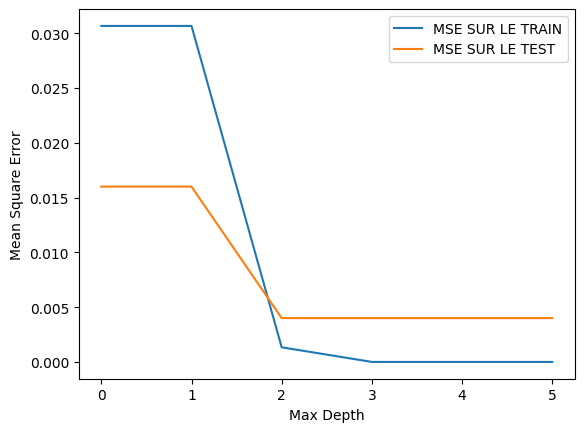

In [13]:
plt.plot(mse_trains)
plt.plot(mse_tests)
plt.legend(["MSE SUR LE TRAIN", "MSE SUR LE TEST"])
plt.xlabel("Max Depth")
plt.ylabel("Mean Square Error")
plt.draw()

Coder une fonction entropy(p) qui calcule l'entropy d'une variable aléatoire pouvant prendre

La formule pour une distribution générale est 
$ e = \sum_i -p_i log (p_i) $  

In [14]:
def entropy(p):
    return np.sum(-p*np.log(p))

Calculer l'entropy pour une pièce ayant pour probabilité p = 0.5 de faire face. 




In [15]:
entropy(0.5)

0.34657359027997264

Calculer l'entropyer pour une pièce ayant pour probabilité p = 0.1 de tomber sur face

In [16]:
entropy(0.1)

0.23025850929940456

On va maintenant s'intéresser à l'utilisation de l'entropy pour des arbres de décisions

In [17]:
def generate_data():
    import numpy as np

    X = np.random.randn(100, 1)
    y =  0.5 + X[:, 0]

    y[y > 0.5] = 1
    y[y <= 0.5] = 0
    return X, y

X,y = generate_data()
y

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.])

la fonction permet de charger un dataset constitué uniquement d'attributs binaires. Charger le dataset. 

Afficher sur un scatter plot Y en fonction de X. Vous afficherez de deux couleurs différentes


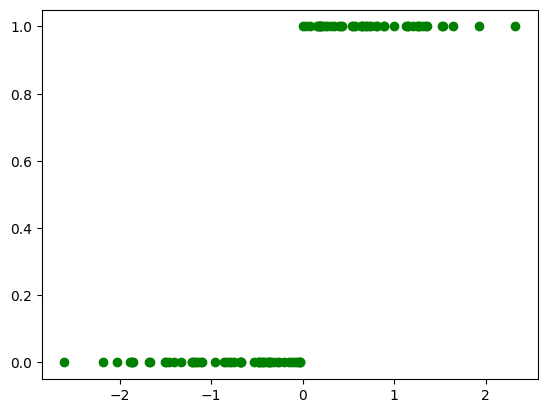

In [26]:
colors = 'green'
plt.scatter(X, y, color=colors)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5911237d-bf07-4252-964e-d1881f596410' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>